In [1]:
import matplotlib.pyplot as plt
import skimage.measure
import numpy as np
import cv2
import PIL

import random
import time

print("Importing Q-Space Lib...")
from q_space import Environment
from q_space import Model
from q_space import DataGen
from q_space import Logging
from q_space import Experiment

Importing Q-Space Lib...


#### An Example of data generation for auto-encoder:

In [2]:
Experiment.Generate_Random_AutoEncoder_Data(n=640*10)

Env: BreakoutNoFrameskip-v4
Obs: Box(210, 160, 3)
Actions: Discrete(4) - ['NOOP', 'FIRE', 'RIGHT', 'LEFT']
Reward range: (-inf, inf)


TypeError: pre_process_obs() got an unexpected keyword argument 'show'

#### Building the Auto-encoder:

In [34]:
crop = DataGen.crop_height(Environment.OBS_SHAPE, False, True, False)
encoder_in = crop[2:]
print("Encoder Input: ", encoder_in)
print("Cropping images with: ", crop)

Encoder Input:  (23, 36)
Cropping images with:  (16, 0, 23, 36)


In [35]:
# full
# autoencoder, encoder, decoder = Model.make_auto_encoder(Environment.OBS_SHAPE)

autoencoder, encoder, decoder = Model.make_auto_encoder(encoder_in)

#### Building data generators:

In [42]:
3936 % 64

32

In [43]:
import importlib
importlib.reload(DataGen)

<module 'q_space.DataGen' from 'c:\\Users\\aeunal\\Pictures\\itü\\ai\\Project\\q_space\\DataGen.py'>

In [44]:
train_ds, val_ds = DataGen.autoencoder_data_generators(Environment.OBS_SHAPE)
print("Train batches:", len(train_ds))
train_ds = DataGen.normalize_datagen(train_ds, crop=crop)
val_ds = DataGen.normalize_datagen(val_ds, crop=crop)

Found 7872 files belonging to 1 classes.
Using 3936 files for training.
Found 7872 files belonging to 1 classes.
Using 3936 files for validation.
(None, 23, 36, 1)
(None, 23, 36, 1)


In [47]:
Model.fit(autoencoder, train_ds, val_ds)
Model.Save(autoencoder, "only_mid")

Epoch 1/500
123/123 [==============================] - 6s 42ms/step - loss: 0.5239 - val_loss: 0.2483
Epoch 2/500
123/123 [==============================] - 1s 11ms/step - loss: 0.1185 - val_loss: 0.0567
Epoch 3/500
123/123 [==============================] - 1s 12ms/step - loss: 0.0399 - val_loss: 0.0306
Epoch 4/500
123/123 [==============================] - 1s 11ms/step - loss: 0.0258 - val_loss: 0.0232
Epoch 5/500
123/123 [==============================] - 1s 11ms/step - loss: 0.0211 - val_loss: 0.0202
Epoch 6/500
123/123 [==============================] - 1s 11ms/step - loss: 0.0189 - val_loss: 0.0186
Epoch 7/500
123/123 [==============================] - 1s 11ms/step - loss: 0.0178 - val_loss: 0.0176
Epoch 8/500
123/123 [==============================] - 1s 11ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 9/500
123/123 [==============================] - 1s 11ms/step - loss: 0.0165 - val_loss: 0.0165
Epoch 10/500
123/123 [==============================] - 1s 11ms/step - loss: 0.016

In [15]:
autoencoder.fit(train_ds,
                epochs=500,
                batch_size=256,
                validation_data=val_ds)

Epoch 1/500
23/23 [==============================] - 3s 28ms/step - loss: 0.4748 - val_loss: 0.1478
Epoch 2/500
23/23 [==============================] - 0s 14ms/step - loss: 0.0581 - val_loss: 0.0287
Epoch 3/500
23/23 [==============================] - 0s 13ms/step - loss: 0.0271 - val_loss: 0.0261
Epoch 4/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 5/500
23/23 [==============================] - 0s 14ms/step - loss: 0.0253 - val_loss: 0.0254
Epoch 6/500
23/23 [==============================] - 0s 14ms/step - loss: 0.0252 - val_loss: 0.0251
Epoch 7/500
23/23 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.0251
Epoch 8/500
23/23 [==============================] - 0s 13ms/step - loss: 0.0249 - val_loss: 0.0250
Epoch 9/500
23/23 [==============================] - 0s 13ms/step - loss: 0.0248 - val_loss: 0.0250
Epoch 10/500
23/23 [==============================] - 0s 14ms/step - loss: 0.0248 - val_loss: 0.0249

In [17]:
Model.Save(autoencoder, "full_height")

INFO:tensorflow:Assets written to: logs/models/autoencoder_full_height\assets


In [4]:
autoencoder, encoder_in = Model.Load("full_height")
encoder, decoder = Model.extract_encoder_decoder(autoencoder)

1/1 [==============================] - 0s 37ms/step


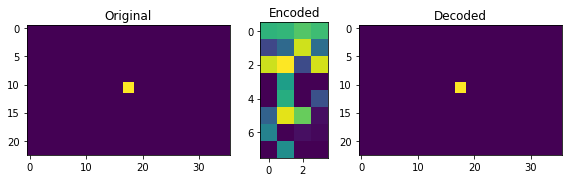

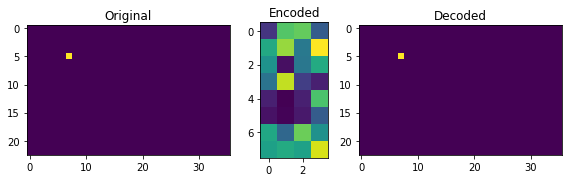

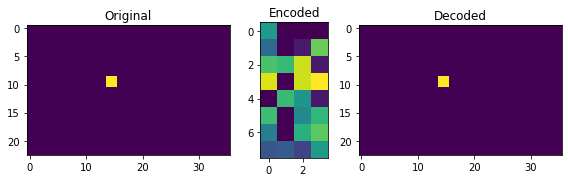

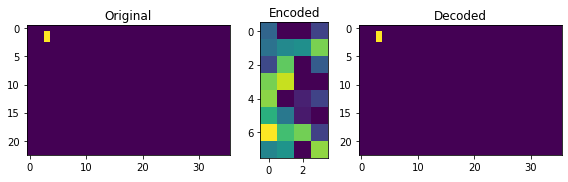

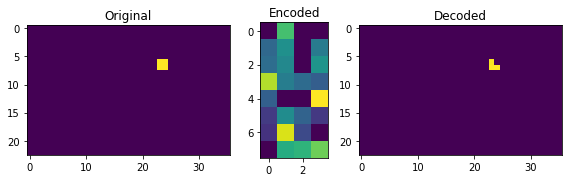

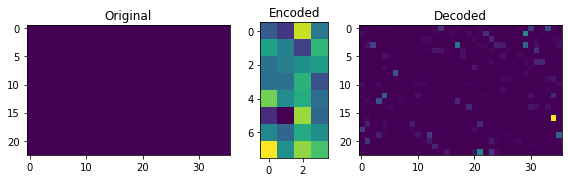

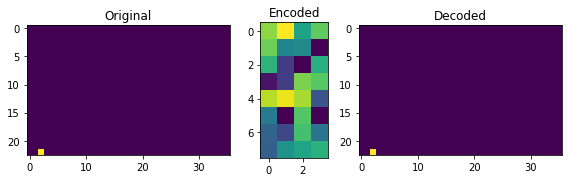

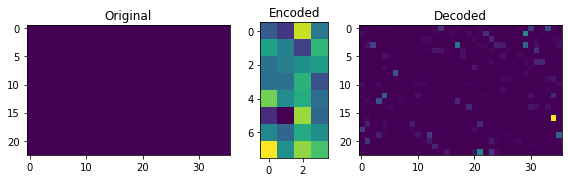

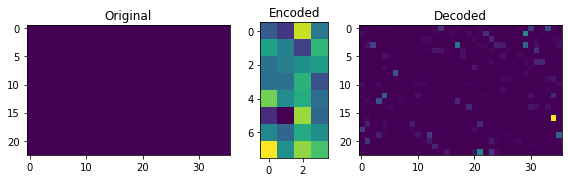

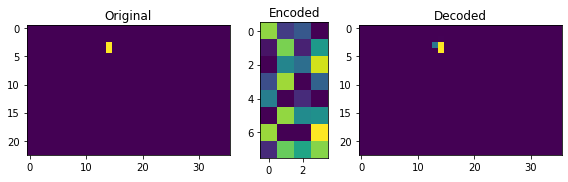

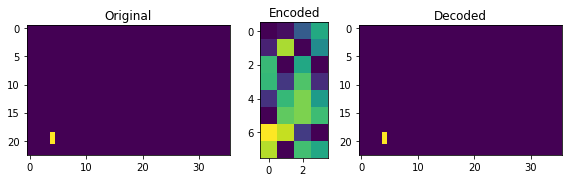

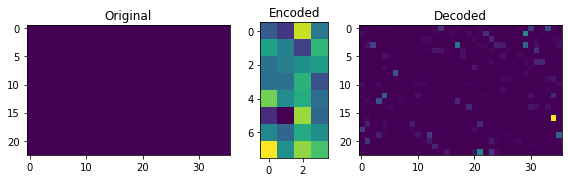

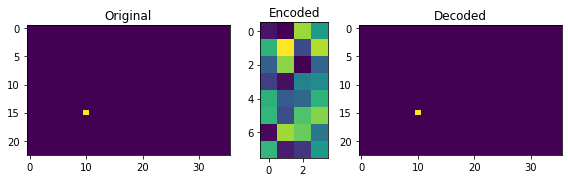

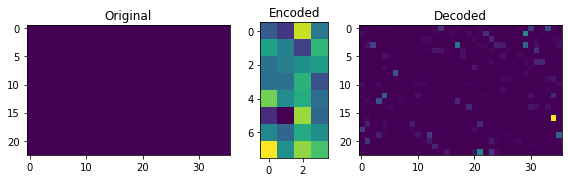

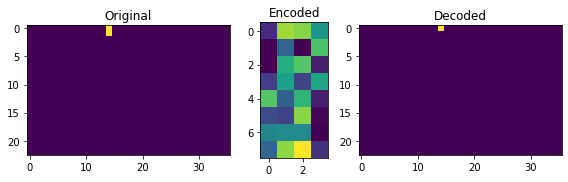

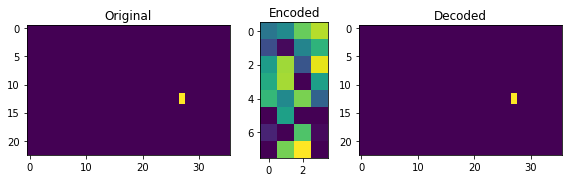

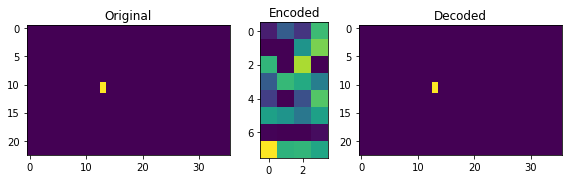

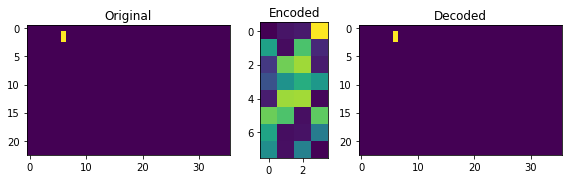

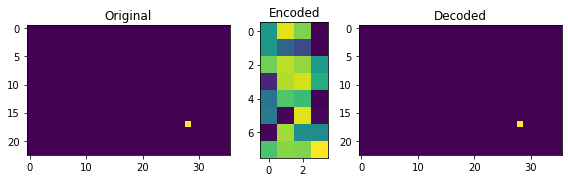

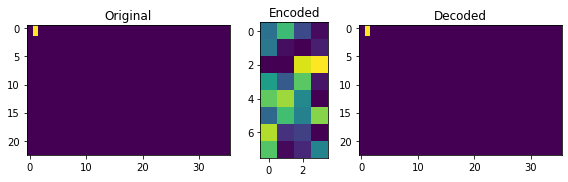

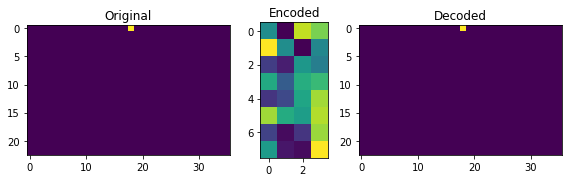

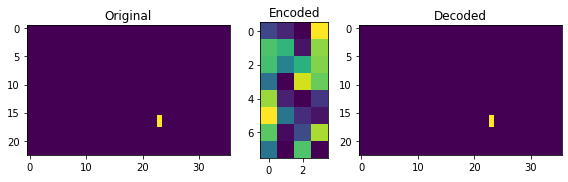

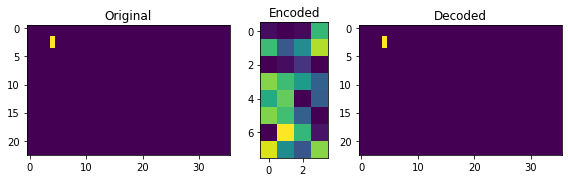

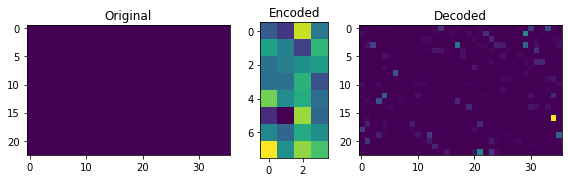

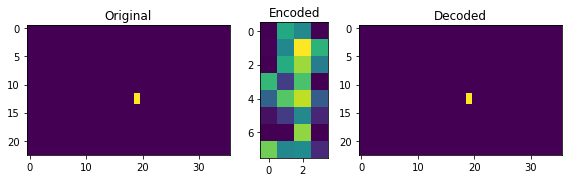

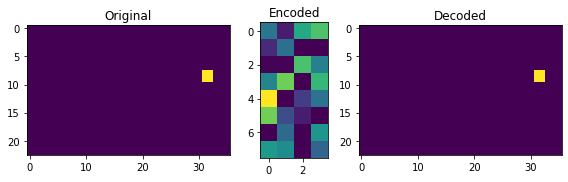

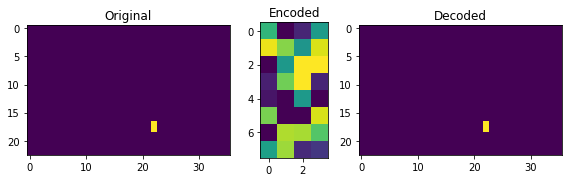

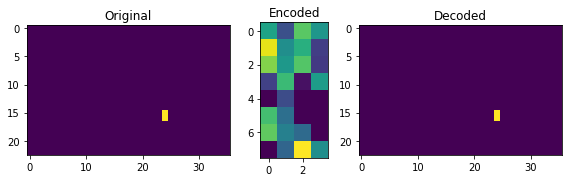

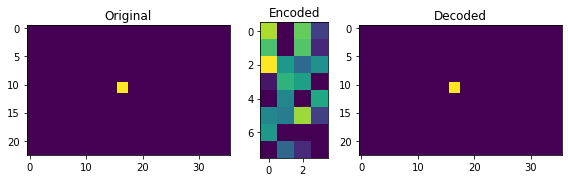

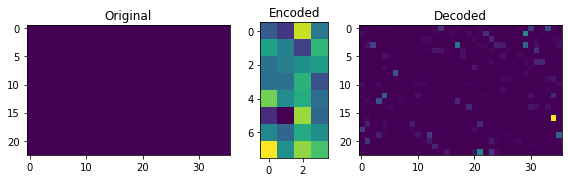

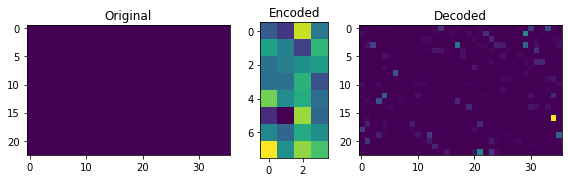

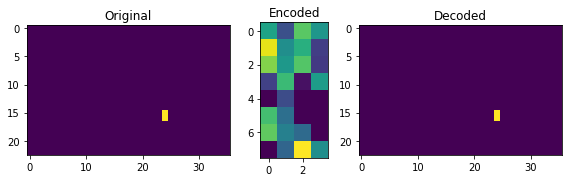

In [49]:
Logging.show_examples_of_autoencoder(val_ds, encoder, decoder, encoder_in)

In [17]:
import importlib
importlib.reload(Logging)

<module 'q_space.Logging' from 'c:\\Users\\aeunal\\Pictures\\itü\\ai\\Project\\q_space\\Logging.py'>

1/1 [==============================] - 0s 22ms/step


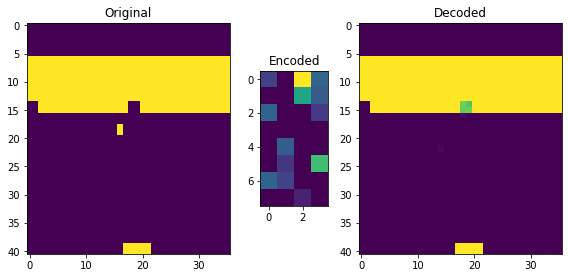

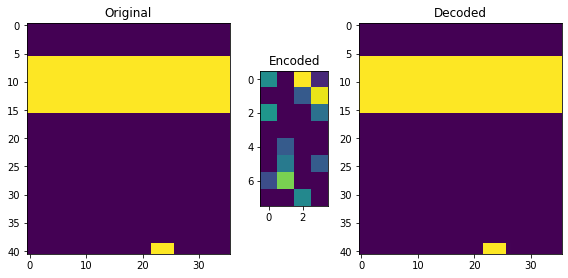

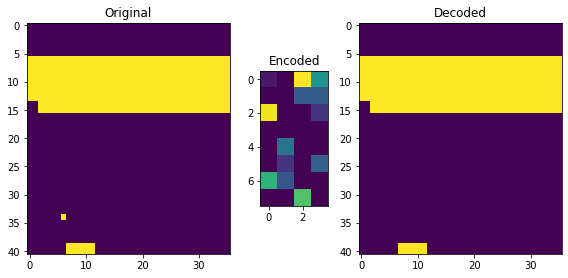

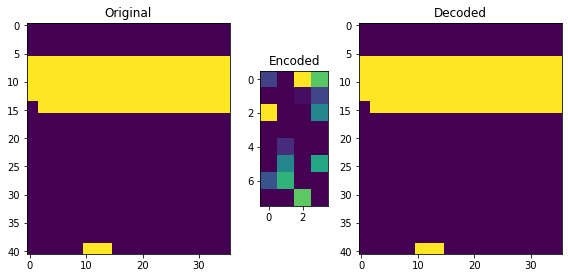

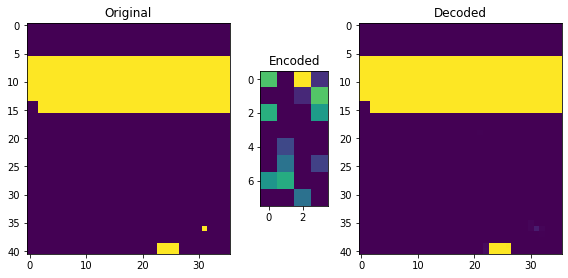

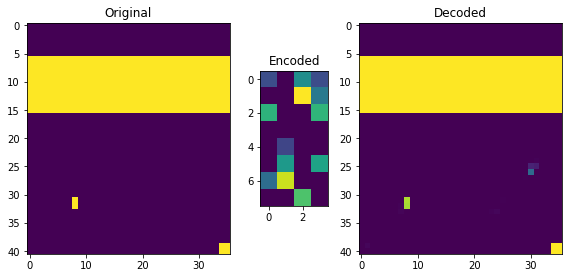

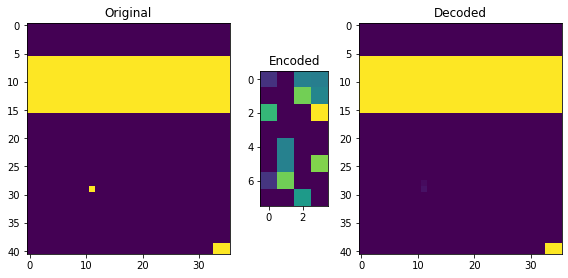

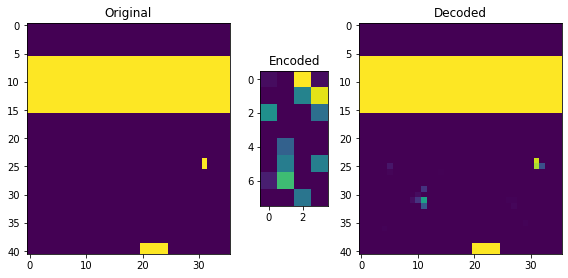

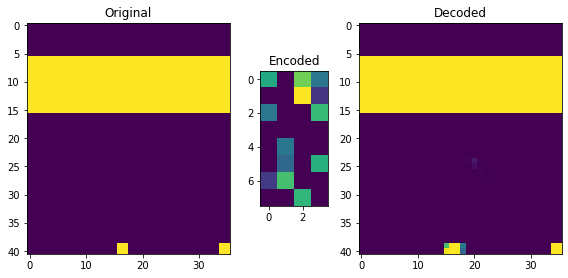

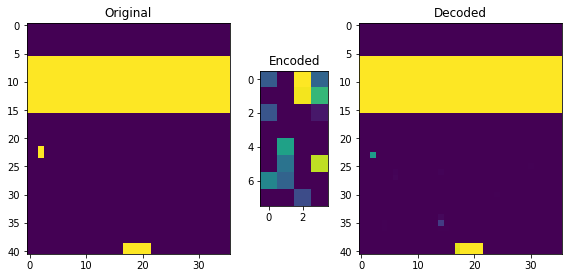

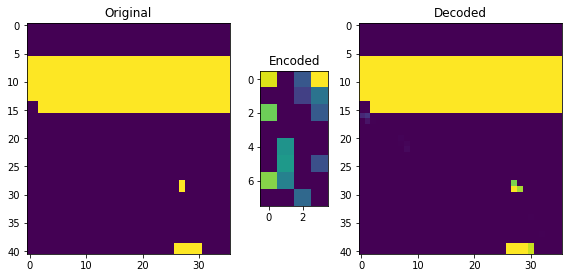

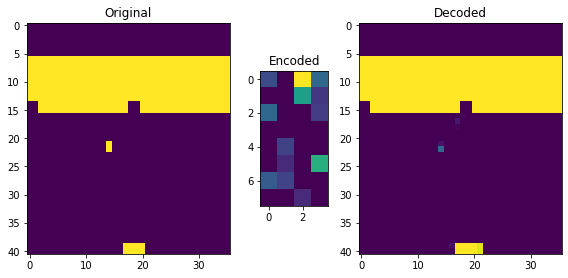

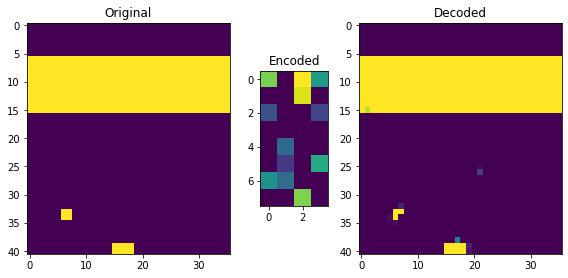

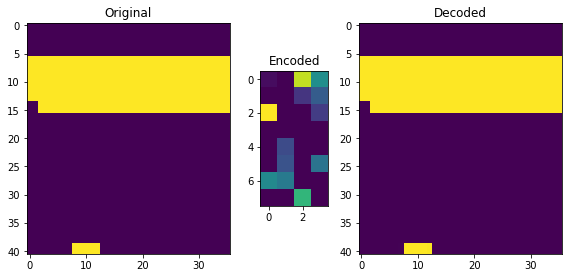

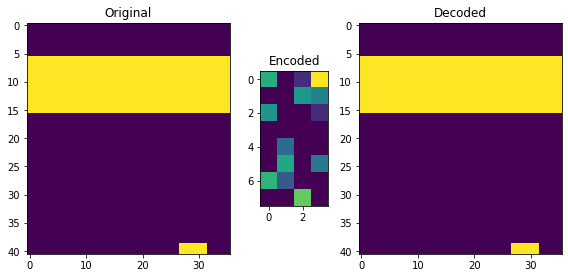

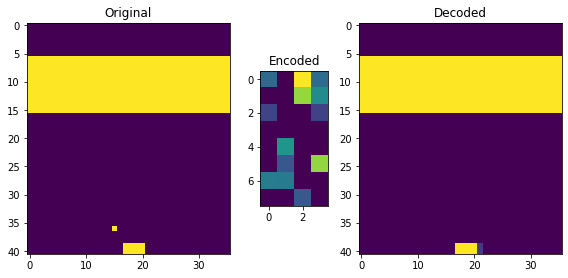

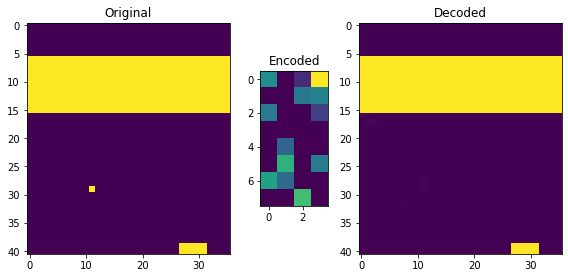

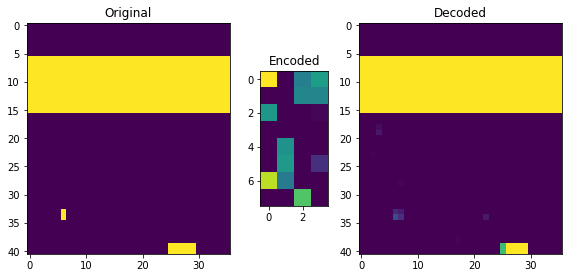

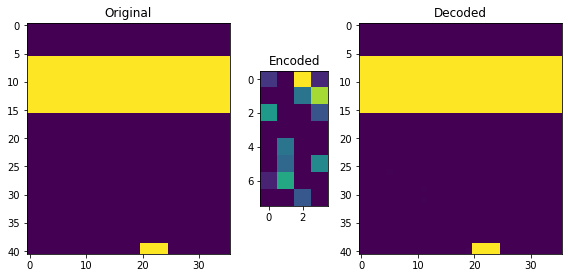

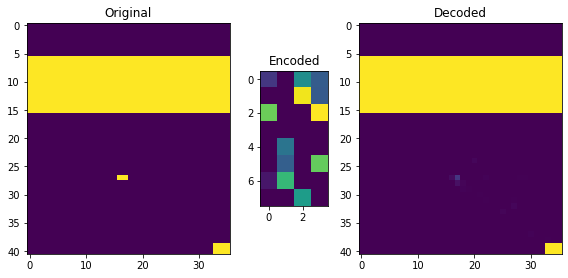

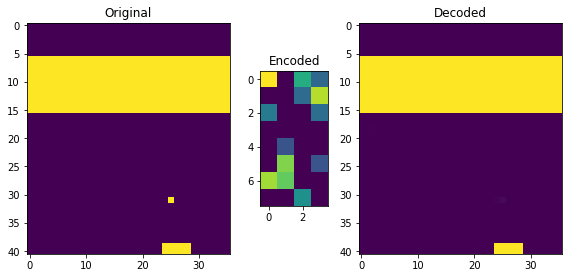

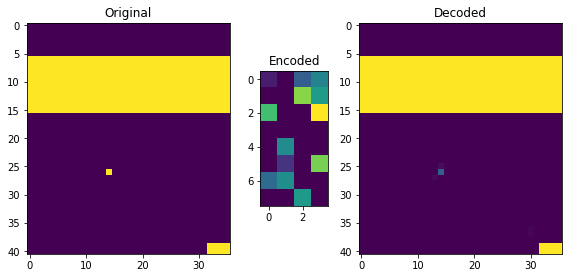

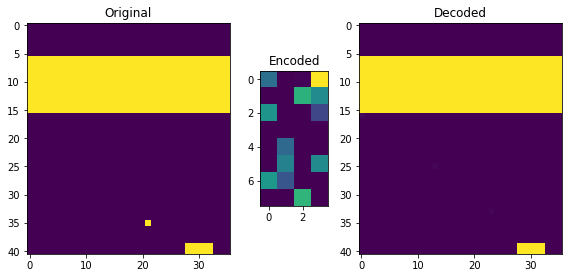

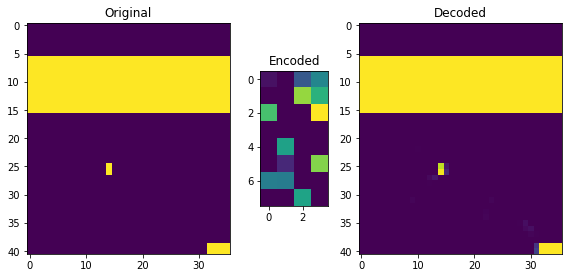

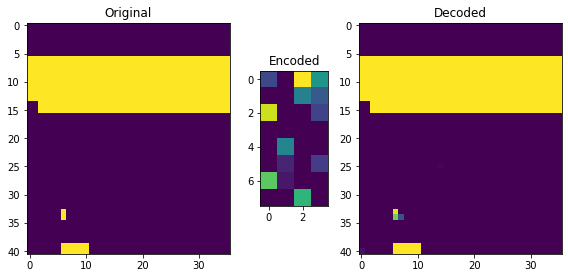

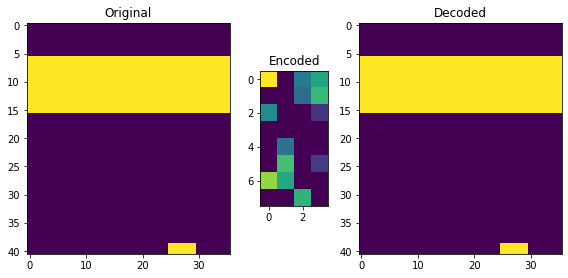

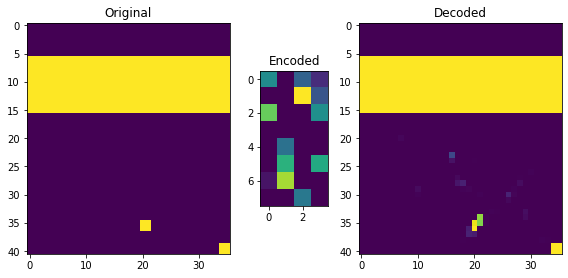

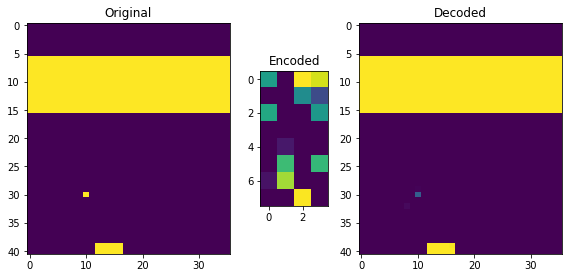

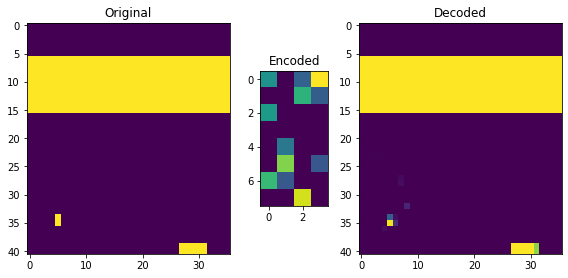

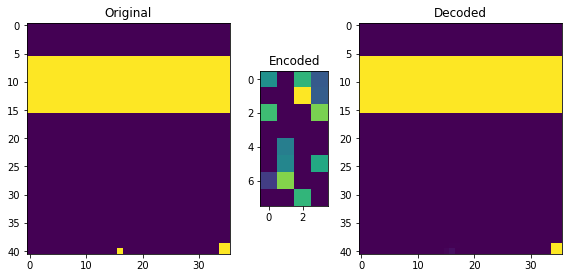

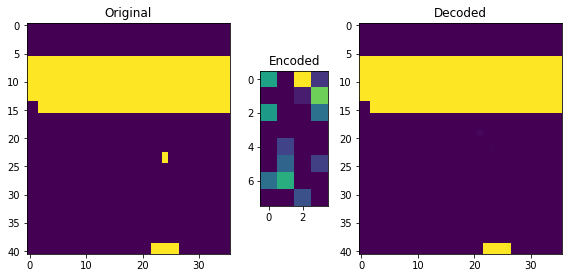

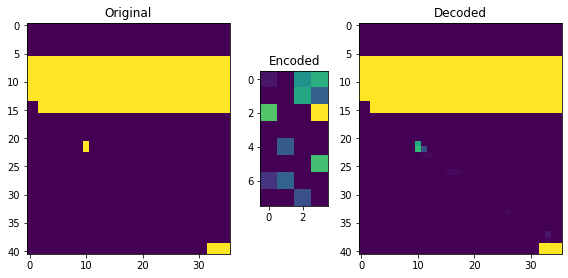

In [32]:
Logging.show_examples_of_autoencoder(val_ds, encoder, decoder, encoder_in)

1/1 [==============================] - 0s 40ms/step


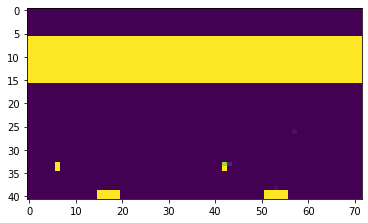

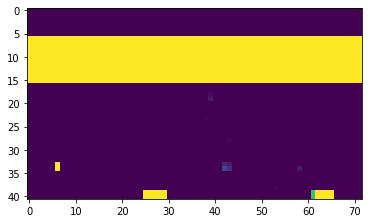

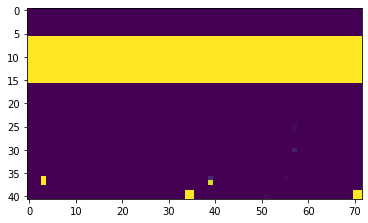

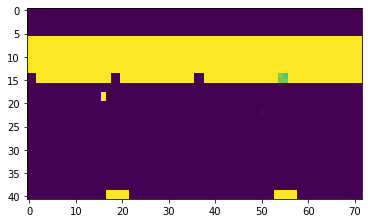

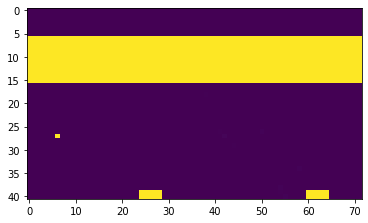

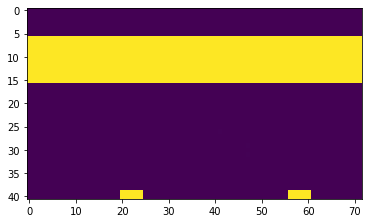

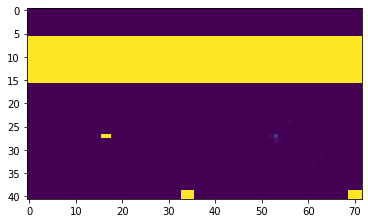

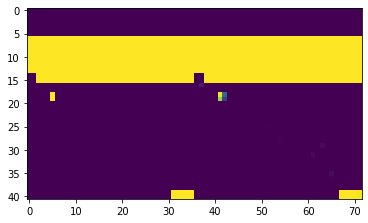

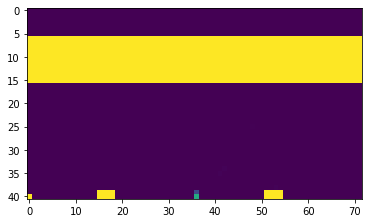

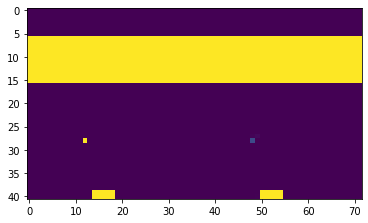

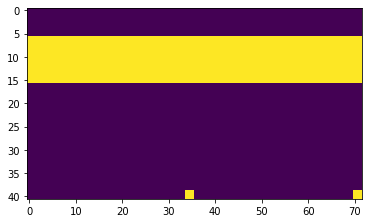

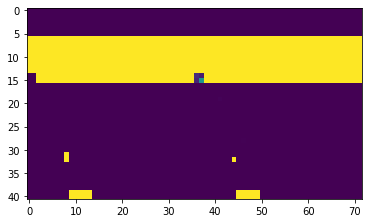

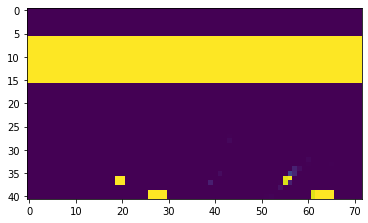

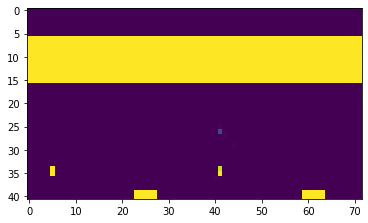

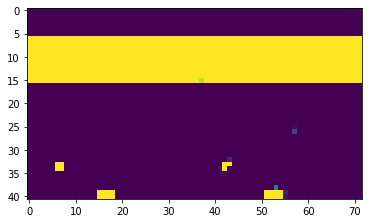

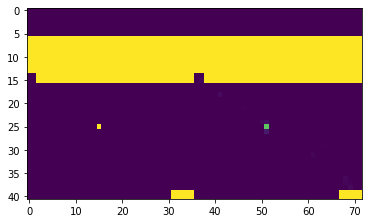

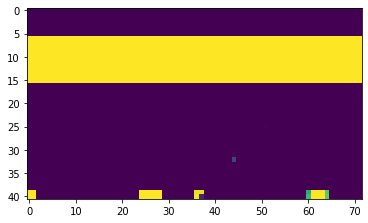

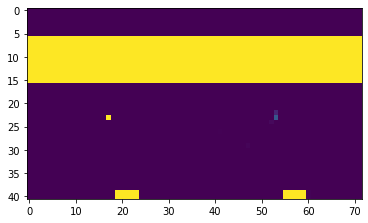

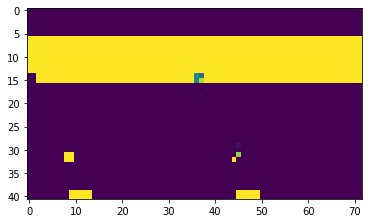

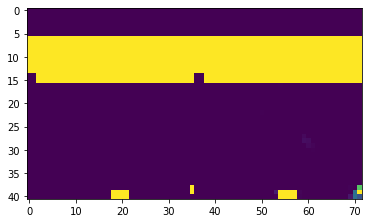

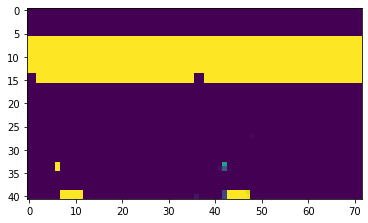

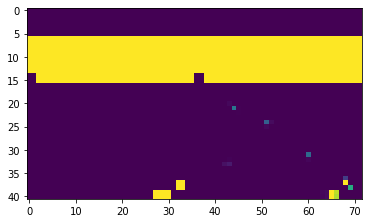

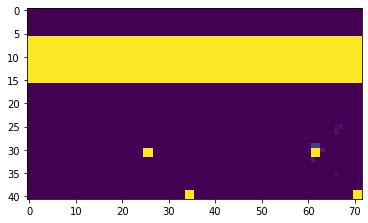

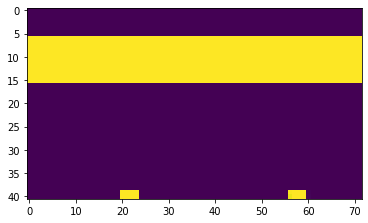

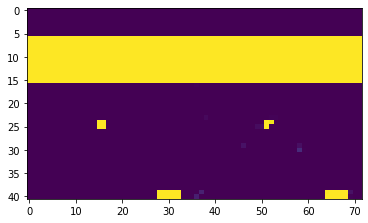

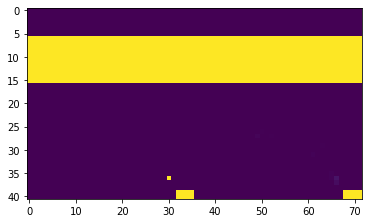

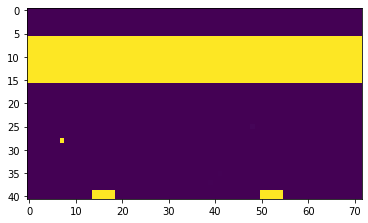

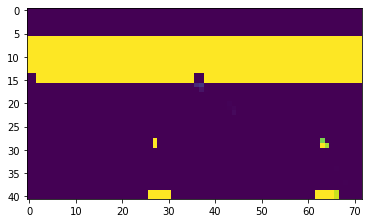

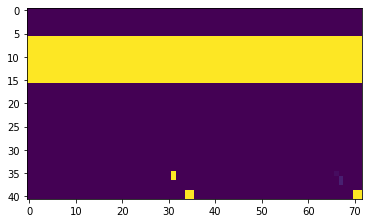

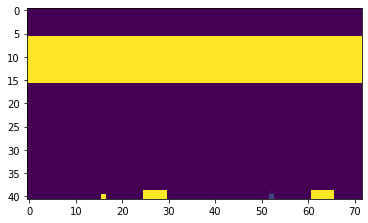

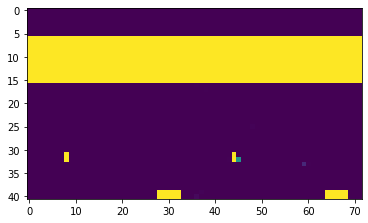

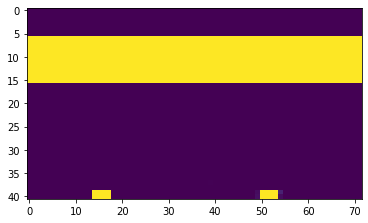

In [7]:
Logging.show_examples_of_autoencoder(val_ds, encoder, decoder, encoder_in)

1/1 [==============================] - 0s 40ms/step


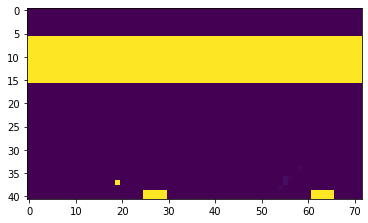

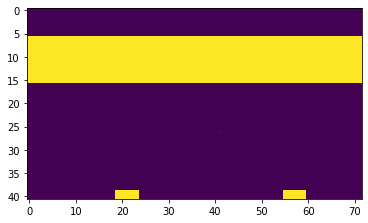

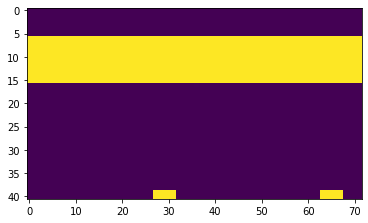

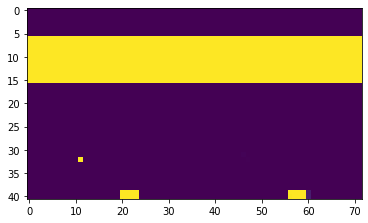

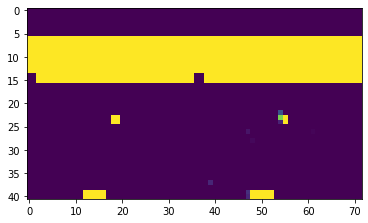

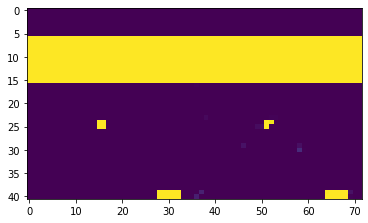

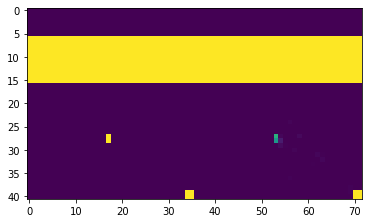

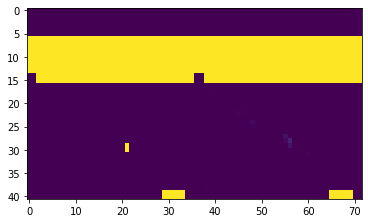

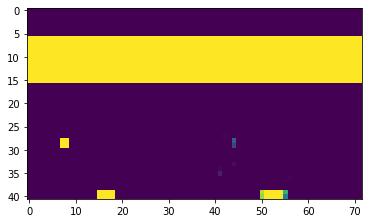

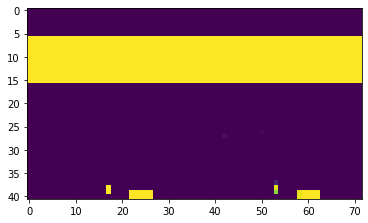

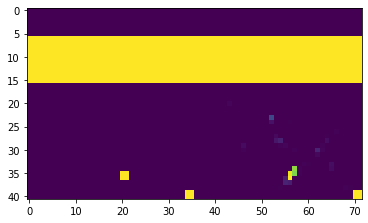

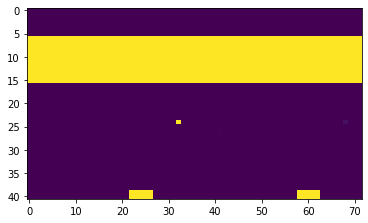

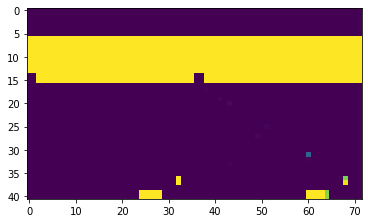

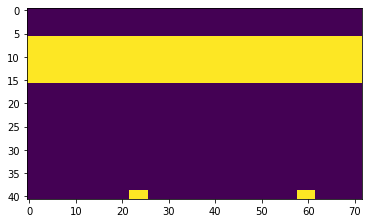

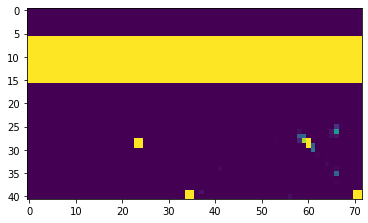

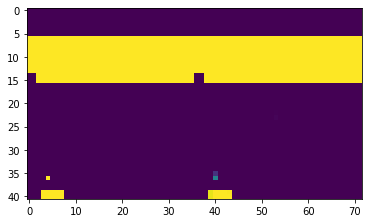

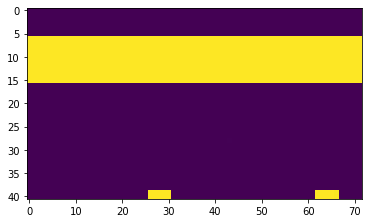

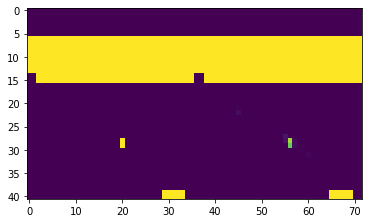

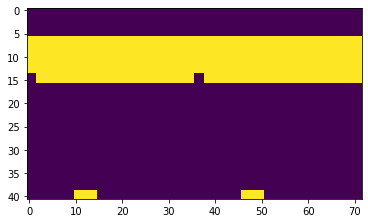

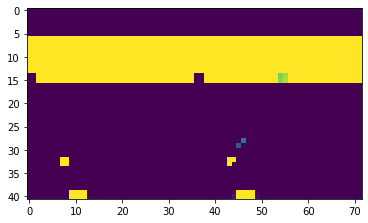

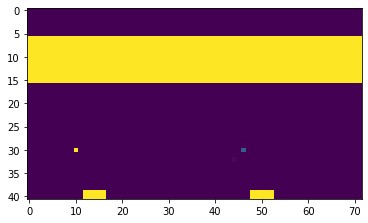

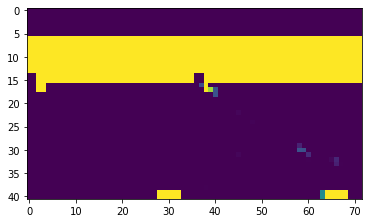

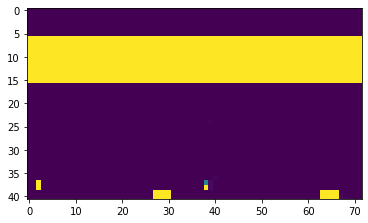

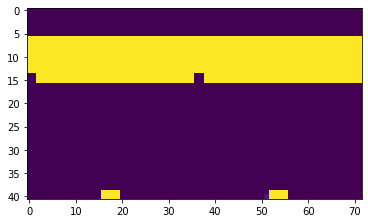

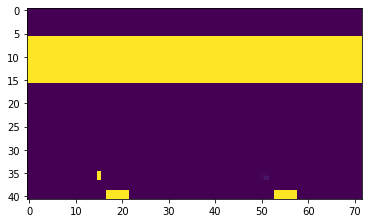

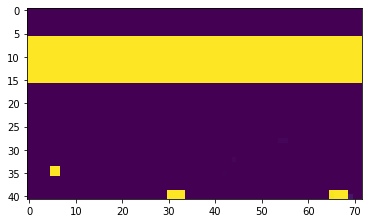

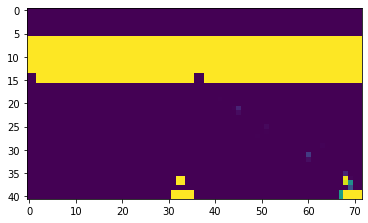

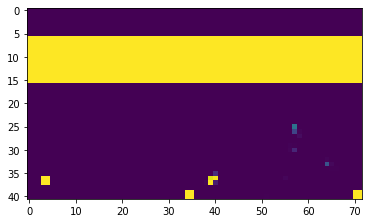

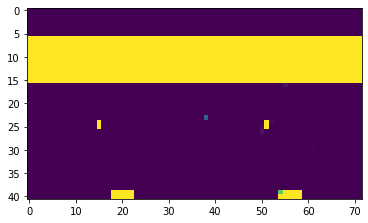

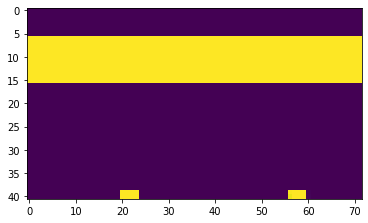

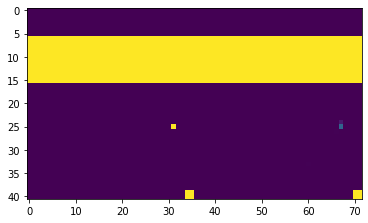

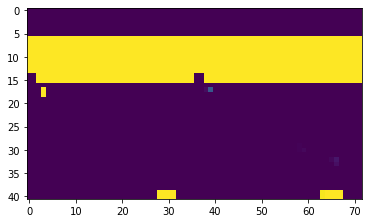

In [16]:
# Crop - 2
from IPython.display import display, clear_output
for image in val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(*encoder_in,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(*encoder_in,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 44ms/step


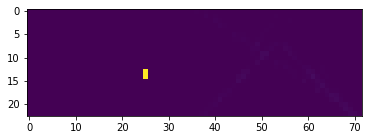

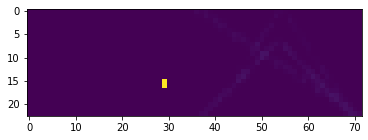

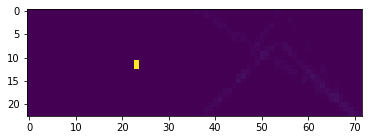

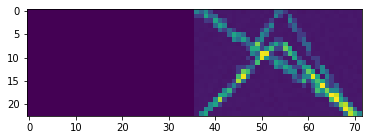

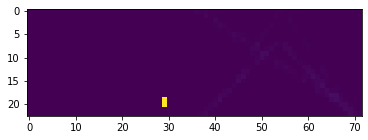

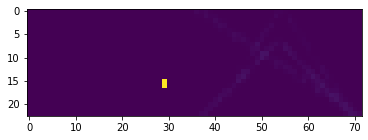

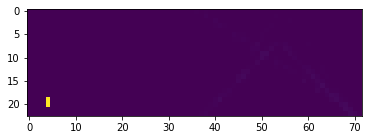

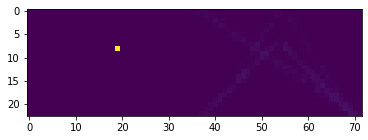

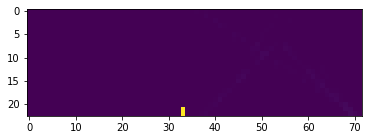

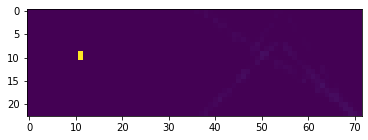

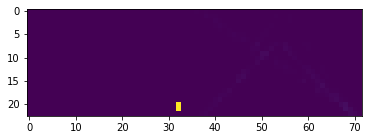

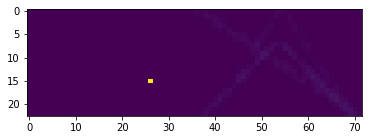

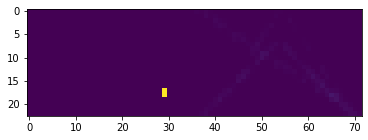

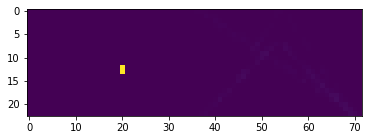

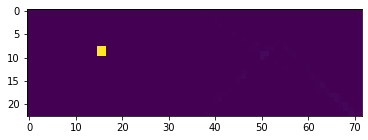

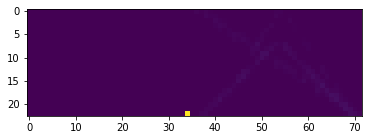

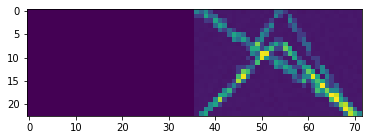

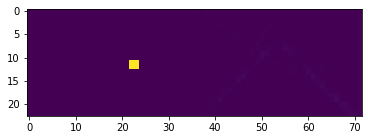

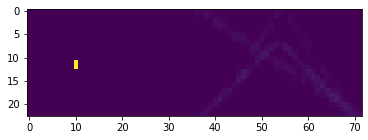

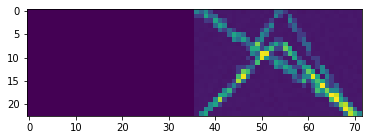

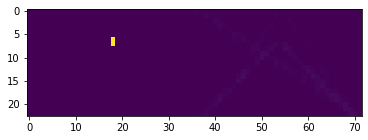

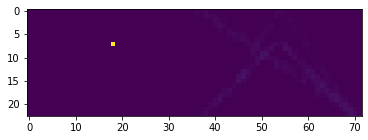

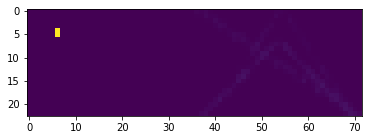

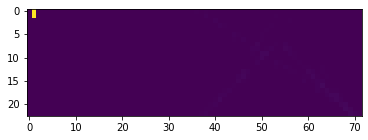

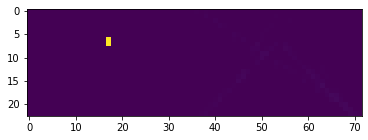

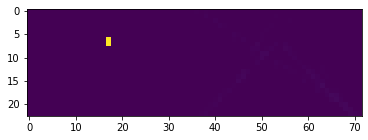

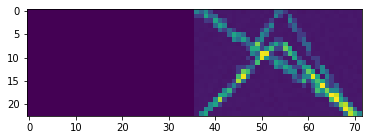

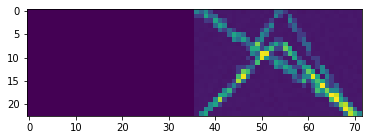

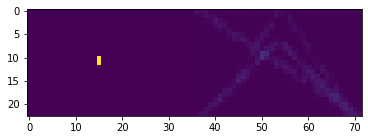

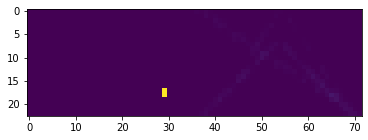

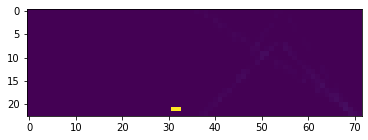

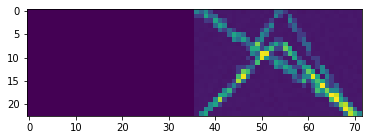

In [21]:
# Crop - 2
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(23,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(23,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 42ms/step


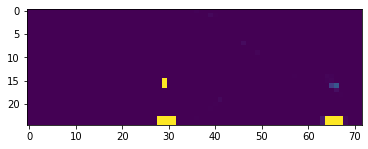

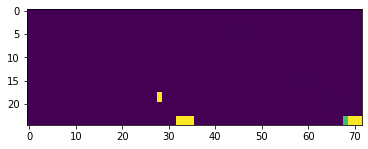

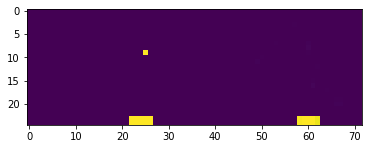

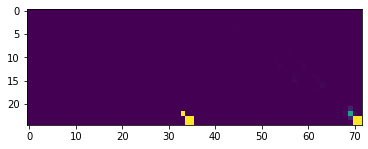

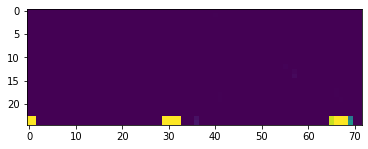

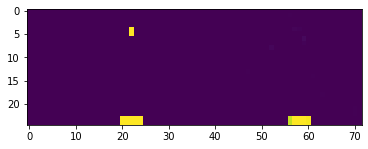

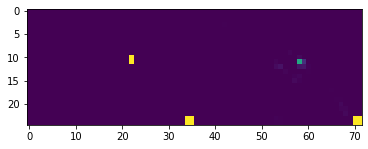

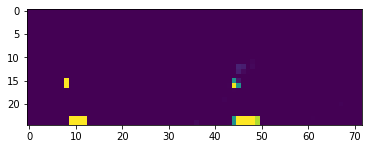

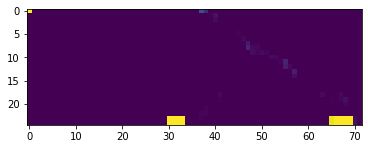

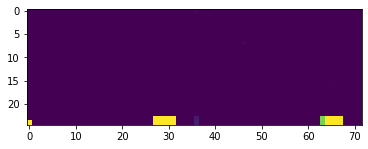

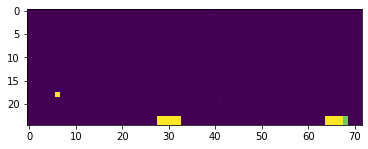

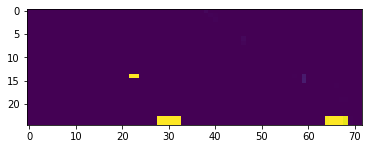

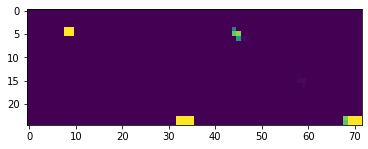

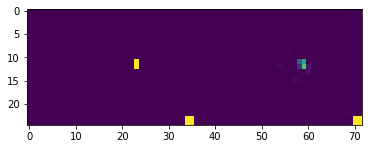

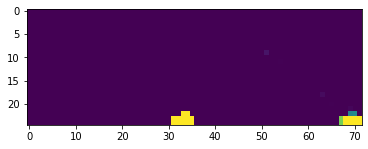

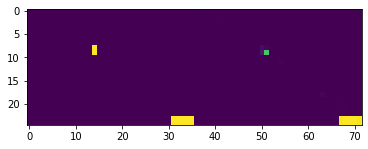

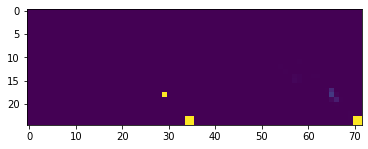

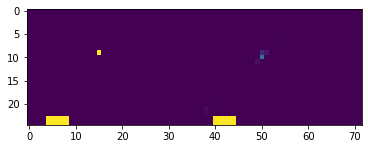

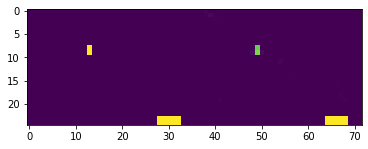

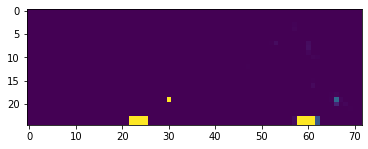

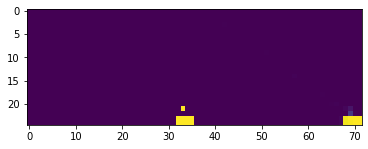

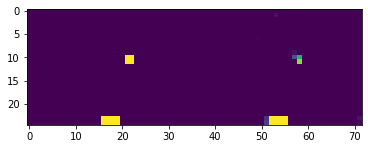

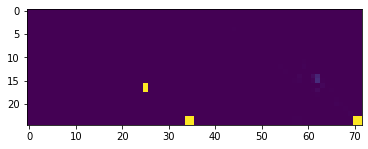

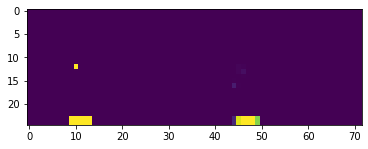

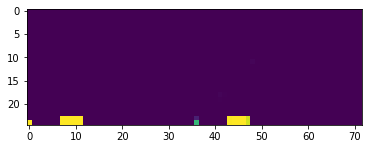

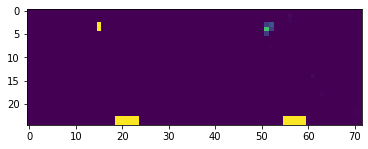

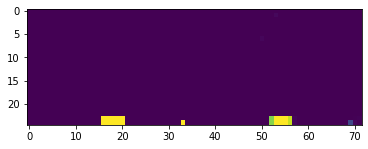

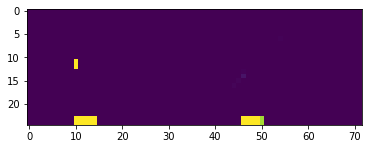

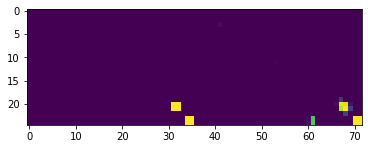

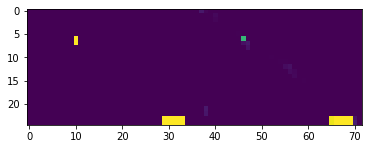

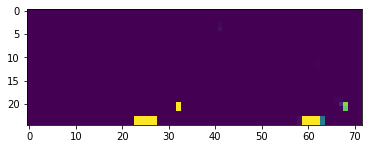

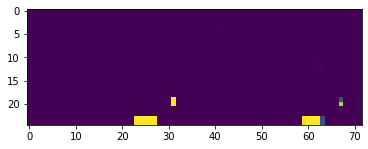

In [11]:
# Crop - 1
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(25,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(25,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 57ms/step


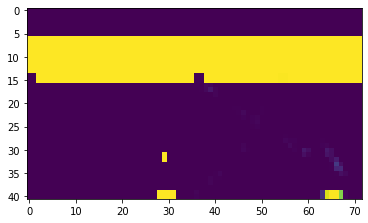

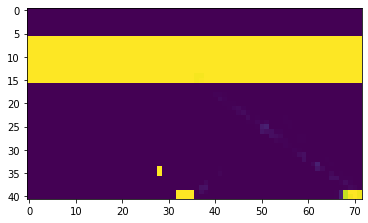

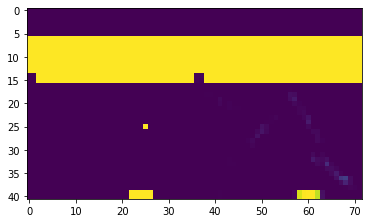

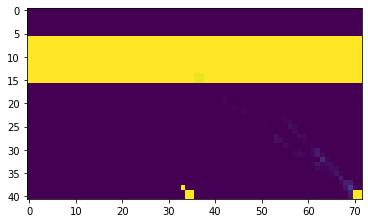

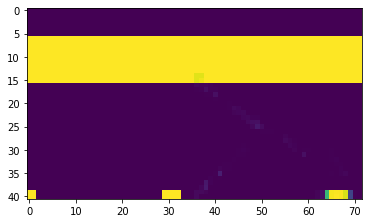

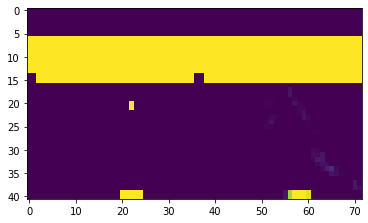

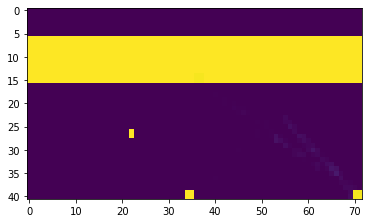

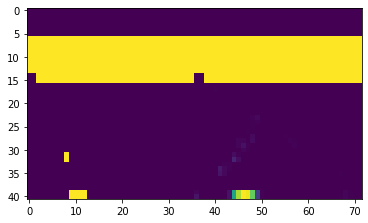

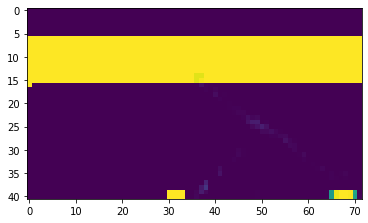

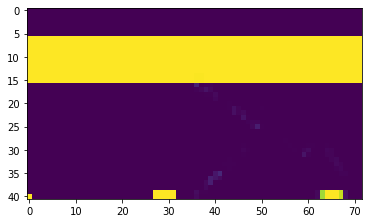

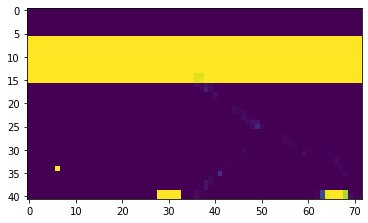

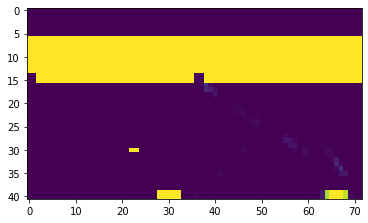

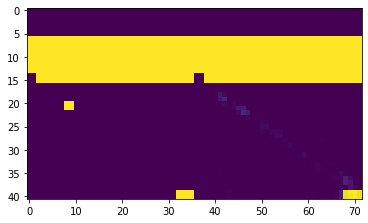

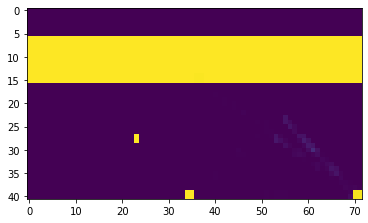

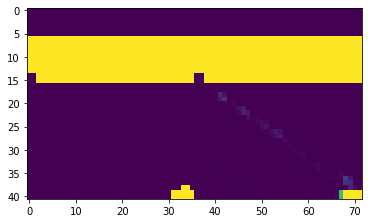

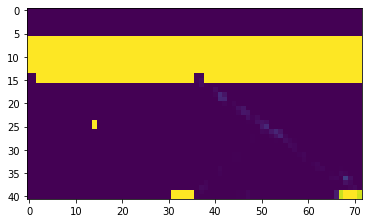

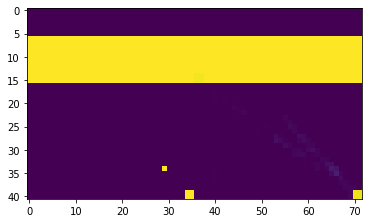

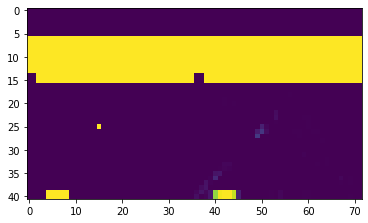

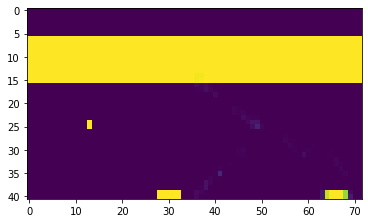

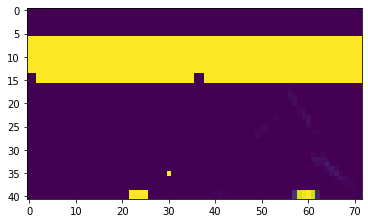

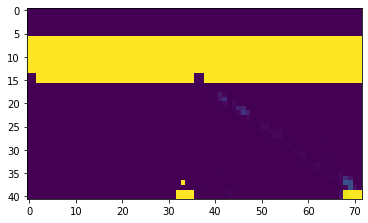

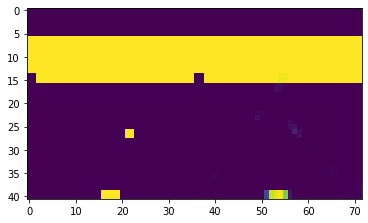

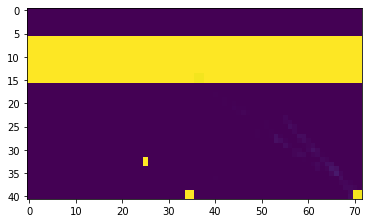

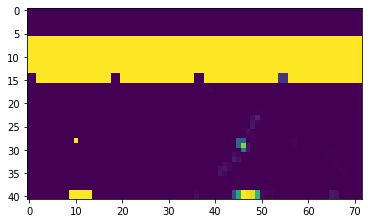

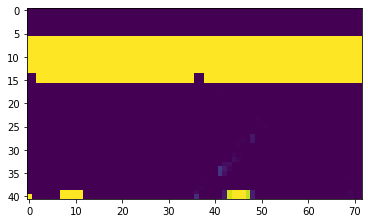

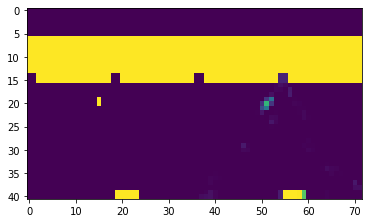

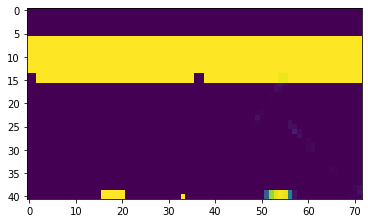

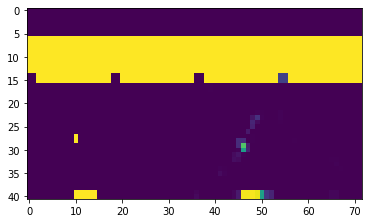

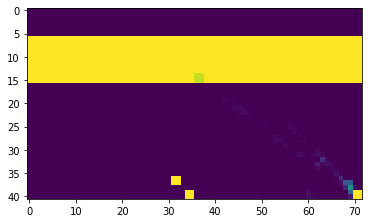

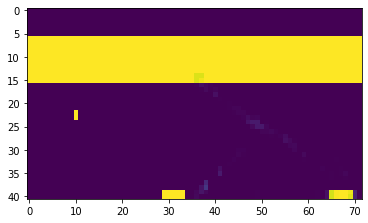

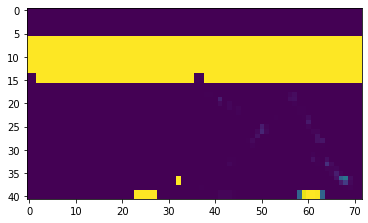

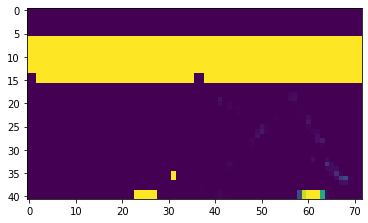

In [54]:
# Hidden Layer
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(41,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(41,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 53ms/step


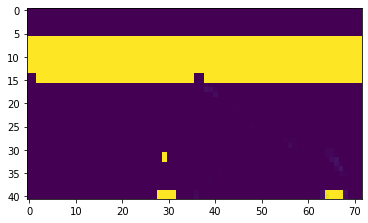

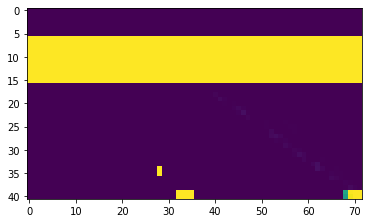

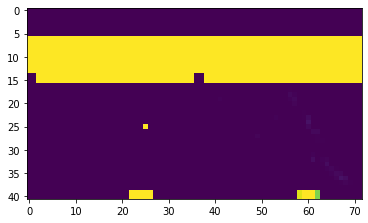

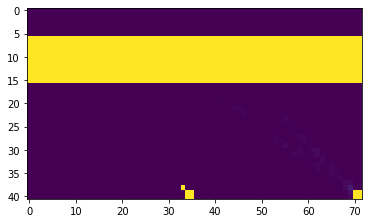

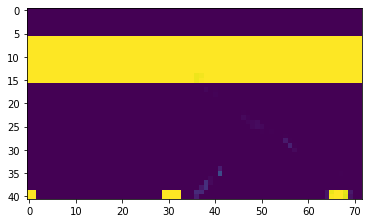

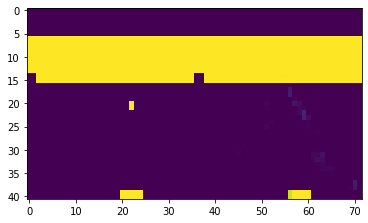

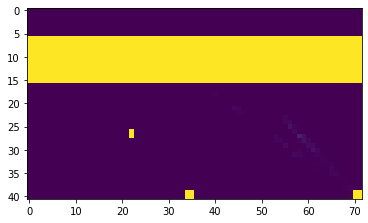

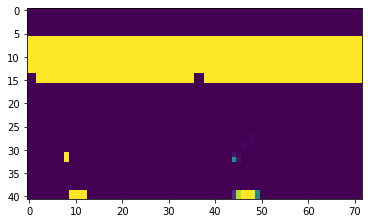

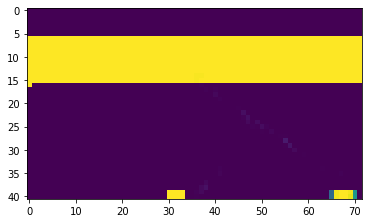

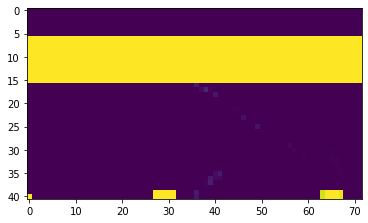

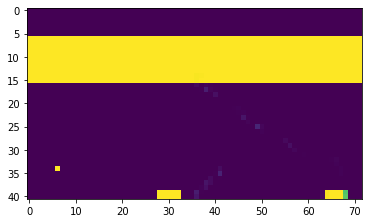

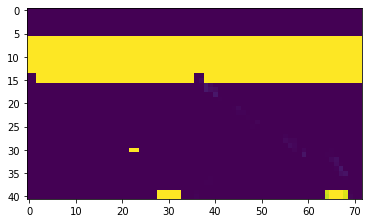

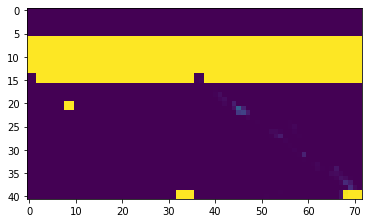

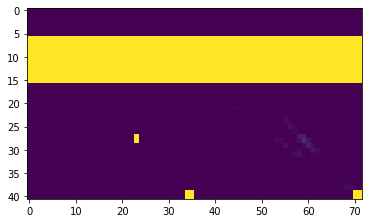

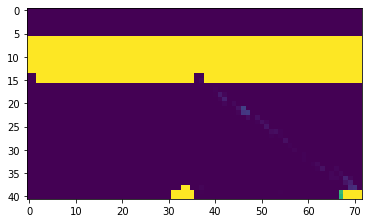

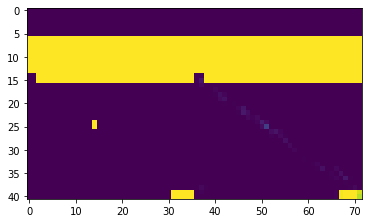

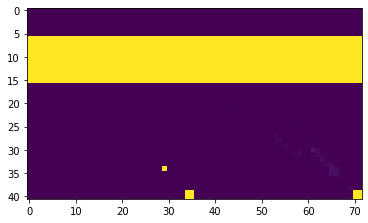

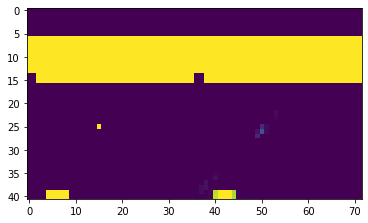

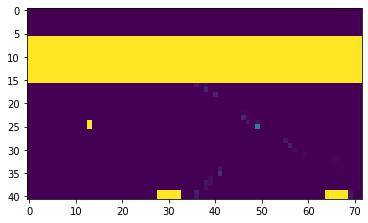

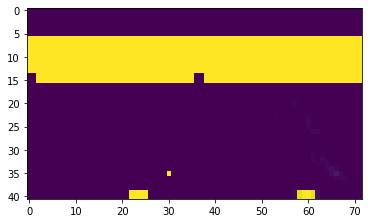

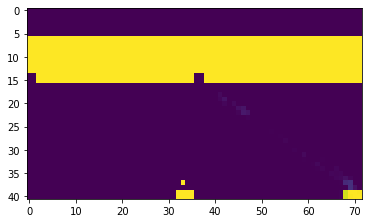

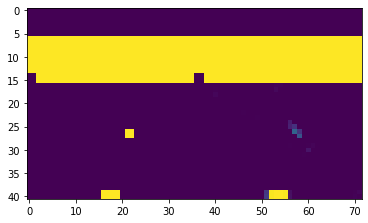

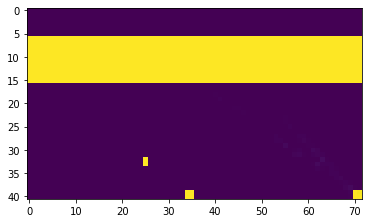

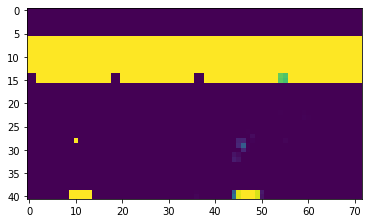

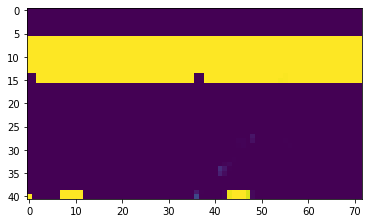

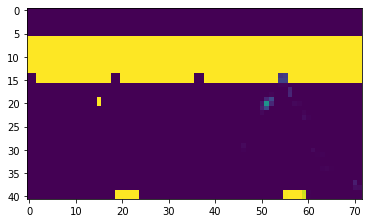

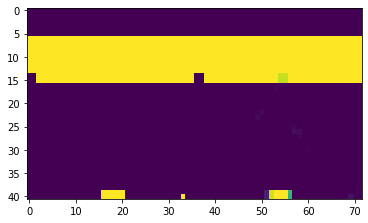

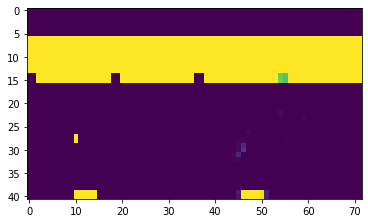

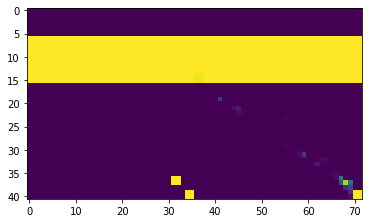

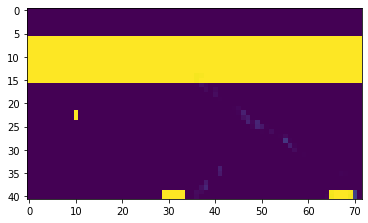

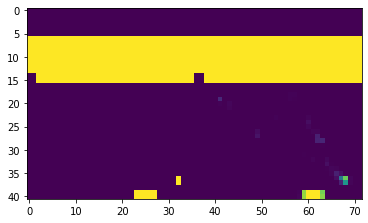

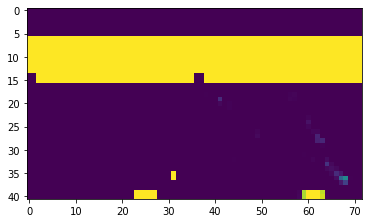

In [15]:
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(41,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(41,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()